In [ ]:
# cwiczenie 2: klasyfikacja recenzji filmow jako "pozytywna", "negatywna"
# 1) cel: klasyfikator binarny, wielowarstwowa siec neuronowa, accuracy; dane treningowe: imdb 
# (wstepnie przygotowane juz do pracy)
# 2) dane: sciagnac dane
# 3) analiza eksploracyjna danych: obejrzec, ksztalt tensorow, rozmiar, typ, rozklady wartosci, rozklad klas,
# obejrzec przykladowe obserwacje (przetlumaczyc z liczb na wyrazy, etc.)
# 4) przygotowanie danych (w przypadku tekstu jest to sporo rzeczy, ale tu juz wiekszosc zrobione, 
#  zeby skupic sie na zadaniu ml): zakodowanie jako wektorow binarnych, ew. konwersja typow
# 5) modelowanie: wielowarstwowa siec jednokierunkowa typu "dense", z odpowiednią funkcja aktyw. na koncu 
# 6) ewaluacja: podzial na zbior treningowy i walidacyjny sledzenie straty i dokladnosci na zbiorze walidacyjnym (wczesne zatrzymywanie)  aby uniknac przetrenowania i dostroic liczbe epok; 
# + dodatkowo: przetestowac rozne modele i konfiguracje (np. liczba warstw, neuronow, f-cja straty, etc.)
# 7) podsumowanie

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd

%matplotlib inline

from keras.datasets import mnist

In [4]:
nwords = 5000
from tensorflow.keras.datasets import imdb

In [5]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = nwords)

17464789/17464789 [==============================] - 0s 0us/step


In [8]:
print(list([o.shape, o.dtype] for o in [train_data, train_labels, test_data, test_labels]))

[[(25000,), dtype('O')], [(25000,), dtype('int64')], [(25000,), dtype('O')], [(25000,), dtype('int64')]]


In [9]:
type(train_data)

numpy.ndarray

In [10]:
x = train_data[0]
type(x)

list

In [13]:
len(x), type(x[0])

(218, int)

In [16]:
l = [len(x) for x in train_data]

In [17]:
min(l), max(l)

(11, 2494)

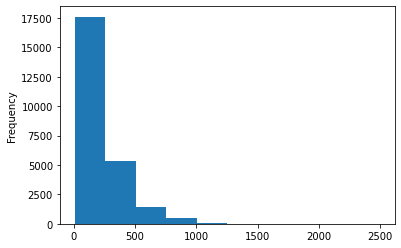

In [19]:
d = pd.Series(l)
d.plot.hist()

In [20]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [22]:
np.unique(train_labels)

array([0, 1])

In [24]:
train_labels.mean(), test_labels.mean()

(0.5, 0.5)

In [25]:
index = imdb.get_word_index()

invertedIndex = dict([(k, v) for (v,k) in index.items()])

def decodeReview(wordlist):
  return " ".join([invertedIndex.get(i-3, '?') for i in wordlist])

1641221/1641221 [==============================] - 0s 0us/step


In [29]:
for i in range(5):
  print(train_labels[i], decodeReview(train_data[i]))

1 ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly ? was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little ? that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big ? for the whole film but these children are amazing and should be ? for what they have done don't you think the whole story w

In [ ]:
#napisz funkcje kazdy z list zakoduje w formie wektora 
#czyli bag of words
#float32 zamiast float64
#2 wartwa ukryta relu po 16 neuronow (WIECEJ?MNIEJ)
#ostatnia sigmoidalna
#do metody fit odszukać idealną  liczbą epok dzieki wydzieleniu zbioru walidacyjnego

